# DeepPokemon

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

Import the dataset

In [2]:
file=('/Users/helenamargarida/Desktop/PokeML/Pokemon.csv')
database=pd.read_csv(file)

In [3]:
database.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Some Pokemons don't have a Type 2. We must adress these missing values.

In [4]:
database=database.fillna(value={'Type 2':'None'}).drop(['#'],axis=1)
database

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


I am also going to convert the Legendary property to binary

In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
database['Legendary'] = labelencoder.fit_transform(database['Legendary'])

Let's show the Legendary Pokemon

In [39]:
Legendaries=np.array(database[database['Legendary']==1].Name)
Legendaries

array(['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'MewtwoMega Mewtwo X',
       'MewtwoMega Mewtwo Y', 'Raikou', 'Entei', 'Suicune', 'Lugia',
       'Ho-oh', 'Regirock', 'Regice', 'Registeel', 'Latias',
       'LatiasMega Latias', 'Latios', 'LatiosMega Latios', 'Kyogre',
       'KyogrePrimal Kyogre', 'Groudon', 'GroudonPrimal Groudon',
       'Rayquaza', 'RayquazaMega Rayquaza', 'Jirachi',
       'DeoxysNormal Forme', 'DeoxysAttack Forme', 'DeoxysDefense Forme',
       'DeoxysSpeed Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga',
       'Palkia', 'Heatran', 'Regigigas', 'GiratinaAltered Forme',
       'GiratinaOrigin Forme', 'Darkrai', 'ShayminLand Forme',
       'ShayminSky Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion',
       'Virizion', 'TornadusIncarnate Forme', 'TornadusTherian Forme',
       'ThundurusIncarnate Forme', 'ThundurusTherian Forme', 'Reshiram',
       'Zekrom', 'LandorusIncarnate Forme', 'LandorusTherian Forme',
       'Kyurem', 'KyuremBlack Kyurem', 'KyuremWhite 

We can use .describe() to explore the data

In [7]:
database.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


So, for example, there are 800 pokemons, from generation 1 to 6. The mean Total points is 435, the weakest being 180 and the strongest 780. Which pokemons are these?

In [8]:
weakest=database.iloc[database['Total'].idxmin,:].Name

strongest=np.array(database[database['Total']==database['Total'].max()].Name)
print('The weakest pokemon overall is',weakest,'and the strongest are',strongest)

The weakest pokemon overall is Sunkern and the strongest are ['MewtwoMega Mewtwo X' 'MewtwoMega Mewtwo Y' 'RayquazaMega Rayquaza']


What about the starters? How do they compare?

In [9]:
starters=database[database['Name'].isin(['Bulbasaur','Squirtle','Charmander'])]
starters

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0
9,Squirtle,Water,None,314,44,48,65,50,64,43,1,0


In [10]:
bulbasaur_stats=np.array(starters.iloc[0,4:10])
charmander_stats=np.array(starters.iloc[1,4:10])
squirtle_stats=np.array(starters.iloc[2,4:10])


categories = database.columns.drop(['Total','Type 1','Type 2','Name','Generation','Legendary'])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=bulbasaur_stats,
      theta=categories,
      fill='toself',
      name='Bulbasaur',
      marker_color='#2ca02c',
      opacity=0.6
))
fig.add_trace(go.Scatterpolar(
      r=charmander_stats,
      theta=categories,
      fill='toself',
      name='Charmander',
      marker_color='tomato',
      opacity=0.6
))

fig.add_trace(go.Scatterpolar(
      r=squirtle_stats,
      theta=categories,
      fill='toself',
      name='Squirtle',
      marker_color='cornflowerblue',
      opacity=0.7
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=False
)

fig.show()


Turns out Charmander is not that much greater than I thought as a kid. This of course derives from the fact that, as a kid, everything related to fire was stronger. Is this really true? What type is stronger on average?

‘Total’ column is the sum of all the stats values, and I think it is a good indicator of overall stats of a Pokemon. So, let’s see how ‘Total’ values are distributed across Pokemons within type.

In [28]:
my_order = database.groupby('Type 1').Total.median()
my_order.sort_values(ascending=False, inplace=True)

colours = ['#6F35FC','#A98FF3','#B7B7CE','#F95587','#EE8130','#F7D02C','#B6A136','#96D9D6','#705746','#735797','#C22E28','#6390F0','#E2BF65','#7AC74C','#A8A77A','#D685AD','#A33EA1','#A6B91A']

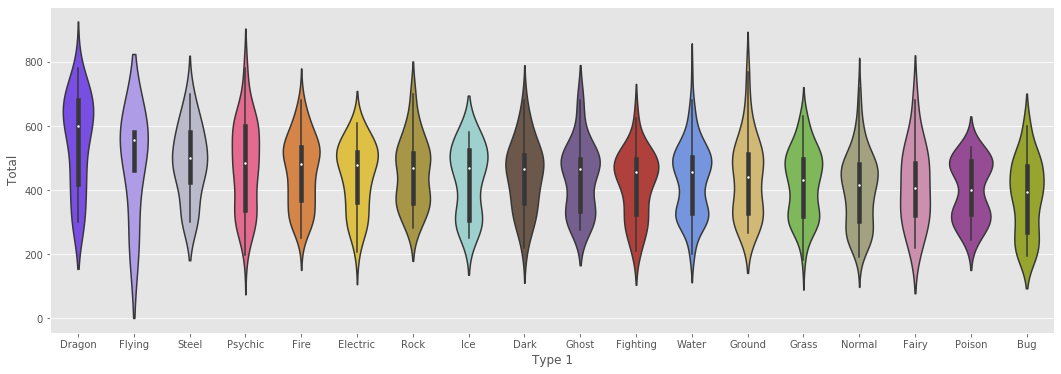

In [27]:
plt.figure(figsize=(18,6))
sns.violinplot(x='Type 1',y='Total',data=database,palette=sns.color_palette(colours),order=my_order.index);

So, fire is definitely not the best Type. It is Dragon. I am under the impression that most of the Legendary Pokemons are of Dragon type. Is this true? Let's check.

In [80]:
legendaries_db=database[database['Legendary']==True] #getting the legendaries in a database
counts=legendaries_db.groupby('Type 1').Name.count() #grouping them by Type and counting how many in each type
(counts/counts.sum()*100).sort_values() #Calculate the percentage that each type represents, and sort them in order to be easier to interpret

Type 1
Fairy        1.538462
Dark         3.076923
Flying       3.076923
Ghost        3.076923
Ice          3.076923
Normal       3.076923
Grass        4.615385
Electric     6.153846
Ground       6.153846
Rock         6.153846
Steel        6.153846
Water        6.153846
Fire         7.692308
Dragon      18.461538
Psychic     21.538462
Name: Name, dtype: float64

So, my assumption was not really that far from reality. Approximately 18.5% of the Legendaries are of Dragon type. It is not the most common one, though. It's Pyschic.